In [342]:
import sys
sys.path.append('..')  # Go up one directory to where utils.py is located
import importlib
import utils  # Ensure you import the module itself, not specific items
importlib.reload(utils)  # Reload the module to apply updates
from utils import * 

Consider the simple harmonic oscillator $x:\mathbb{R}^+ \to \mathbb{R}$ given by:
$$
\text{(BVP)} \ \begin{cases}
\frac{d^2x}{dt^2} &= -\omega^2 x \\
x(0) &= q_0 \\
\frac{dx}{dt}|_{t=0}& = p_0.
\end{cases}
\iff 
\begin{cases}
\frac{dx}{dt} = y \\
\frac{dy}{dt} = -\omega^2 x  \\
x(0) = q_0 \\
y(0) = p_0.
\end{cases},
$$
where we defined $y:= \frac{dx}{dt}$. Our goal is to implement a simple DeepONet to approximate a solution for this BVP.

The analytical solution of (BVP) is 
$$
\begin{cases}
x(t) = q_0 \cos(\omega t) + \frac{p_0}{\omega}\sin(\omega t)\\
y(t) = p_0 \cos(\omega t) - q_0 \omega \sin(\omega t)\\
\end{cases}
$$

In [343]:
# Get analytical solution of the BVP for given t and omega
def analytic_solution(bv, t, w=1):
    q0 = bv[:,None,0] 
    p0 = bv[:,None,1] 
    x = q0 @ np.cos(w * t).T + (p0 @ np.sin(w * t).T) / w
    y = p0 @ np.cos(w * t).T - (q0 @ np.sin(w * t).T) * w
    #return np.stack((x.astype(np.float32), y.astype(np.float32)), axis=-1)
    return x

# Returns a (len(w), len(t))-shape matrix

In [344]:
bv = np.random.uniform(low=0, high=1, size=(150, 2)).astype(np.float32)
t = np.random.uniform(low=0, high=5, size=(100, 1)).astype(np.float32)
y_train = analytic_solution(bv, t)
X_train = (bv, t)


In [345]:
bv = np.random.uniform(low=0, high=1, size=(150, 2)).astype(np.float32)
t = np.random.uniform(low=0, high=5, size=(100, 1)).astype(np.float32)
y_test = analytic_solution(bv, t)
X_test = (bv, t)

In [346]:
net = DeepONet([2, 128, 128, 128, 128], [1, 128, 128, 128, 128])
model = Model(X_train, y_train, X_test, y_test, net)
model.train(epochs=100, batch_size=1000)

Epoch 	 Train loss 	 Test loss
10 	 1.72e-02 	 9.62e-03
20 	 5.07e-04 	 2.31e-04
30 	 3.90e-04 	 4.13e-04
40 	 8.73e-04 	 6.17e-04
50 	 2.40e-05 	 2.25e-05
60 	 3.17e-05 	 4.03e-05
70 	 1.37e-04 	 1.35e-04
80 	 2.85e-04 	 1.31e-04
90 	 1.96e-05 	 2.34e-05
100 	 1.39e-05 	 3.53e-05


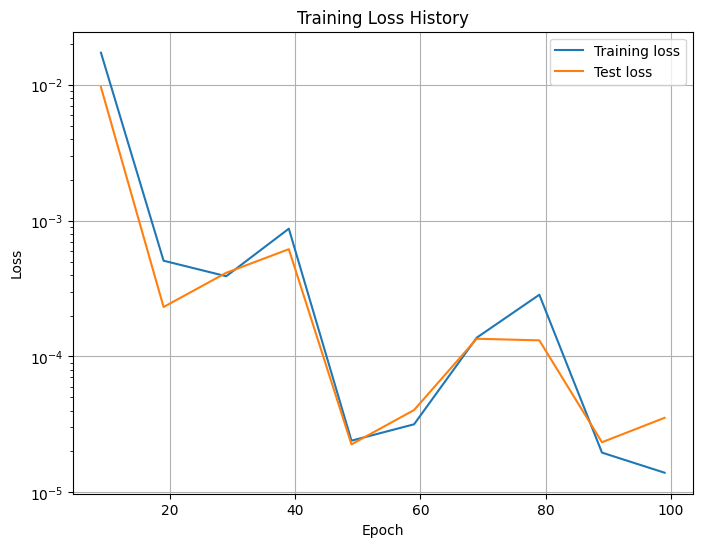

In [347]:
model.plot_losshistory()

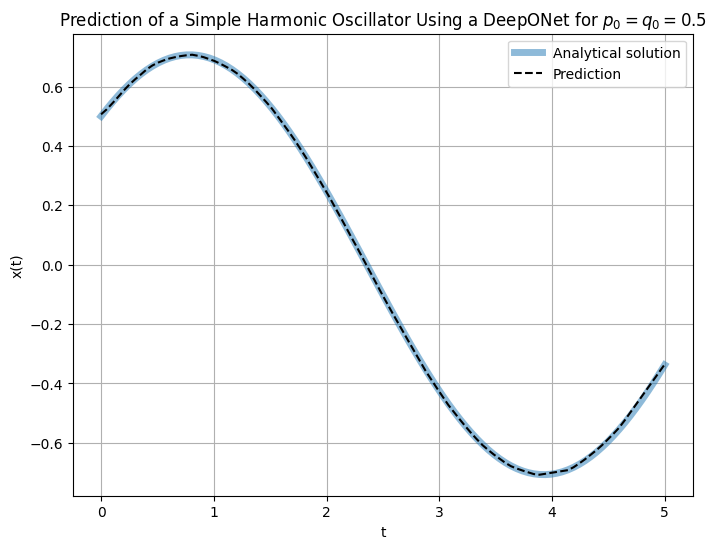

In [348]:
# Plot model prediction for one omega

# Get model prediction

t = np.linspace(0, 5, 100).reshape(-1, 1)
bv = np.array([[0.5, 0.5]])

pred = model.predict(bv, t)

# Get corresponding ground truth
ground_truth = analytic_solution(bv, t)

# Plot prediction vs. solution
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t.flatten(), ground_truth.flatten(), label='Analytical solution', alpha=0.5, linewidth=5)
ax.plot(t.flatten(), pred.tolist(), '--', label='Prediction', c='k')
ax.set_title('Prediction of a Simple Harmonic Oscillator Using a DeepONet for $p_0=q_0=0.5$')
ax.set_xlabel("t")
ax.set_ylabel("x(t)")
ax.legend()
ax.grid(True)
plt.show()